<a href="https://colab.research.google.com/github/ykitaguchi77/GravCont_classification_colab/blob/master/Extend_dataset_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GO extend dataset YOLOv5**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import shutil
import copy
import pandas as pd
import csv
from random import randint
from time import sleep
import numpy as np
import sys
import torch


import glob
import random
from PIL import Image
%matplotlib inline

# #„Çµ„Éù„Éº„Éà„Éë„ÉÉ„ÉÅ„ÅÆ„Ç§„É≥„Éù„Éº„Éà
# from google.colab.patches import cv2_imshow
# import cv2

plt.ion()   # interactive mode
!nvidia-smi
print(torch.cuda.is_available())


Thu Feb  2 15:09:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    55W / 350W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Google colab„Çí„Éû„Ç¶„É≥„Éà

In [2]:
'''
„Éªdlib„ÇíÁî®„ÅÑ„Å¶ÁõÆ„ÇíÂàá„ÇäÊäú„Åè
„ÉªÊ®™ÂπÖ„Çí2ÂÄç„ÄÅÁ∏¶ÂπÖ„Çí‰∏ä„Å´1ÂÄçËøΩÂä†/‰∏ã„Å´0.5ÂÄçËøΩÂä†„Åó„Åü‰∏°Áúº„ÅÆÁîªÂÉè„ÅåÂê´„Åæ„Çå„Çã„Çà„ÅÜ„Å´Âàá„ÇäÂèñ„ÇãÔºàÁõÆ„ÅÆÂÖ®ÂπÖ„ÄÅÁúâÊØõ„ÅåÂê´„Åæ„Çå„Çã„Çà„ÅÜ„Å´Ôºâ
'''

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#ÊÆã„ÇäÊôÇÈñìÁ¢∫Ë™ç
!cat /proc/uptime | awk '{printf("ÊÆã„ÇäÊôÇÈñì : %.2f", 12-$1/60/60)}'


ÊÆã„ÇäÊôÇÈñì : 11.80

In [ ]:
#„ÉÜ„Çπ„ÉàÁîªÂÉè
test_path = '/content/drive/MyDrive/Deep_learning/Face_Images/IMG_3110.JPG'

# GO_extended_dataset„Çí colab‰∏ä„ÅÆ„Éï„Ç©„É´„ÉÄ„Å´Â±ïÈñã
zip_path = '/content/drive/MyDrive/Deep_learning/GO_extended_dataset/GO_extended_dataset.zip'
!unzip $zip_path -d "/content"
in_path_list  = ['/content/GO_extended_dataset/Control_photo_1886mai', '/content/GO_extended_dataset/treatable']
#‰øùÂ≠òÂÖà„Éï„Ç©„É´„ÉÄ
out_path_list = ['/content/GO_extended_dataset/cont_for_yolo', '/content/GO_extended_dataset/grav_for_yolo']


#È°î„ÅÆÁîªÂÉè„Åã„ÇâÁõÆ„ÇíÊ§úÂá∫„Åó„Å¶Âàá„ÇäÊäú„Åè„Çπ„ÇØ„É™„Éó„Éà
„ÉªHaarcascade_eye„Çí‰ΩøÁî®<br>
„ÉªÁõÆ„ÅåÊ§úÂá∫„Åß„Åç„Å™„ÅÑ„ÇÇ„ÅÆ„ÅØskip„Åô„Çã<br>
„ÉªÊ®™ÂπÖ„Çí1/4ÂÄç„ÄÅÁ∏¶ÂπÖ„Çí‰∏ä‰∏ã„Å´1/4ÂÄçËøΩÂä†„Åó„Å¶ÁîªÂÉè„ÇíÂàá„ÇäÂèñ„ÇãÔºàÁõÆ„ÅÆÂÖ®ÂπÖ„ÄÅÁúâÊØõ„ÅåÂê´„Åæ„Çå„Çã„Çà„ÅÜ„Å´Ôºâ

„ÉªÂàá„ÇäÂèñ„Å£„ÅüÁîªÂÉè„ÇíÊ®™ÂπÖ640px„Å´resize„Åô„Çã<br>
„Éª„Éï„Ç©„É´„ÉÄÂÜÖ„ÅÆÁîªÂÉè„Çí‰∏ÄÊã¨Â§âÊèõ„Åó„Å¶Âà•„Éï„Ç©„É´„ÉÄ„Å´‰øùÂ≠ò

#Haarcascade„ÇíÊåáÂÆö

In [ ]:
# „Ç´„Çπ„Ç±„Éº„Éâ„Éï„Ç°„Ç§„É´„ÅÆ„Éë„Çπ
eye_cascade_path = '/content/drive/My Drive/Deep_learning/haarcascade_eye.xml'
# righteye_cascade_path = '/content/drive/My Drive/Deep_learning/haarcascade_righteye_2splits.xml'
# lefteye_cascade_path = '/content/drive/My Drive/Deep_learning/haarcascade_lefteye_2splits.xml'


# „Ç´„Çπ„Ç±„Éº„ÉâÂàÜÈ°ûÂô®„ÅÆÁâπÂæ¥ÈáèÂèñÂæó
eye_cascade = cv2.CascadeClassifier(eye_cascade_path)
# righteye_cascade = cv2.CascadeClassifier(eye_cascade_path)
# lefteye_cascade = cv2.CascadeClassifier(eye_cascade_path)

In [ ]:
#„Ç¢„Çπ„Éö„ÇØ„ÉàÊØî„ÇíÁ∂≠ÊåÅ„Åó„Åü„Åæ„ÅæÊ®™„Çí400pixel„Å´Á∏ÆÂ∞è„Åô„Çã
def scale_to_width(img, width):
    scale = width / img.shape[1]
    return cv2.resize(img, dsize=None, fx=scale, fy=scale)

#Âõ≥„ÇíË°®Á§∫„Åô„Çã
def show_image(img):
    #img = cv2.imread(out_path)
    dst = scale_to_width(img, 200)
    cv2_imshow(dst)

# def show_image_pillow(img):
#     src = cv2.cvtColor(img_resized_list[0], cv2.COLOR_BGR2RGB)
#     plt.imshow(src)

def my_round(val, digit=0):
    p = 10 ** digit
    return int((val * p * 2 + 1) // 2 / p)

def scale_to_width(img, width):
    """ÂπÖ„ÅåÊåáÂÆö„Åó„ÅüÂÄ§„Å´„Å™„Çã„Çà„ÅÜ„Å´„ÄÅ„Ç¢„Çπ„Éö„ÇØ„ÉàÊØî„ÇíÂõ∫ÂÆö„Åó„Å¶„ÄÅ„É™„Çµ„Ç§„Ç∫„Åô„Çã„ÄÇ
    """
    h, w = img.shape[:2]
    height = round(h * (width / w))
    dst = cv2.resize(img, dsize=(width, height))

    return dst

In [ ]:
def crop_bilateral(in_path, class_num, size, showImage=True):
    img_resized_list,side_list = [],[]

    img = cv2.imread(in_path) 
    img2 = img.copy()

    if showImage:
        show_image(img)

    # ÁîªÂÉè„Ç∞„É¨„Éº„Çπ„Ç±„Éº„É´Âåñ
    grayscale_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    #300pix‰ª•‰∏ä„ÅÆ„ÇÇ„ÅÆ„ÅßÁõÆ„Å´Ë¶ã„Åà„Çã„ÇÇ„ÅÆ„ÇíÊäΩÂá∫
    eye_list = eye_cascade.detectMultiScale(grayscale_img, minSize=(300, 300))
    print("")
    print('image path = ',in_path)

    # ÁúºÊ§úÂá∫Âà§ÂÆö
    if len(eye_list) >= 1:
        print('ÁõÆ„Åå' + str(len(eye_list)) +'ÂÄãÊ§úÂá∫„Åï„Çå„Åæ„Åó„Åü')
        pass
    else:
        print("no eye detected")
        pass

    print(f"eye_list: {eye_list}")

    #ÁîªÂÉè„ÅÆÂàá„ÇäÊäú„Åç„Å®‰øùÂ≠òÔºàÈÄ£Áï™„Å´„Åô„ÇãÔºâ
    if len(eye_list)== 2: 

        
        for (ex, ey, ew, eh) in eye_list:
            print("[ex,ey] = %d,%d [ew,eh] = %d,%d" %(ex, ey, ew, eh))
            
            try:
                cv2.rectangle(img2, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

                #Âàá„ÇäÊäú„ÅçÁØÑÂõ≤„ÅåÂÖÉÁîªÂÉè„Çí„ÅØ„ÅøÂá∫„ÇãÂ†¥Âêà„ÅØÈªíÁîªÂÉè„ÅßÂüã„ÇÅ„Çã
                top = max(0, ey-int(eh/4))
                bottom = min(grayscale_img.shape[0], int(ey + eh*5/4))
                left = max(0,int(ex-int(ew/4)))
                right = min(grayscale_img.shape[1], int(ex + ew*5/4))

                #print(f"top:{top}, bottom:{bottom}, left:{left}, right:{right}")

                img_cropped = img[top: bottom,left:right]
                height, width = img_cropped.shape[:2]

                #„ÇØ„É≠„ÉÉ„Éó„Åó„ÅüÁîªÂÉè„ÇíË°®Á§∫
                if showImage:
                    show_image(img_cropped)
            except: 
                pass

       
        ex = min(eye_list[0][0], eye_list[1][0])
        ey = min(eye_list[0][1], eye_list[1][1])
        ew = max(eye_list[0][0]+eye_list[0][2], eye_list[1][0]+eye_list[1][2]) - ex
        eh = max(eye_list[0][1]+eye_list[0][3], eye_list[1][1]+eye_list[1][3]) - ey

        print("[ex,ey] = %d,%d [ew,eh] = %d,%d" %(ex, ey, ew, eh))

        try:
            cv2.rectangle(img2, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

            #Âàá„ÇäÊäú„ÅçÁØÑÂõ≤„ÅåÂÖÉÁîªÂÉè„Çí„ÅØ„ÅøÂá∫„ÇãÂ†¥Âêà„ÅØÈªíÁîªÂÉè„ÅßÂüã„ÇÅ„Çã
            top = max(0, int(ey-eh/4))
            bottom = min(grayscale_img.shape[0], int(ey+7/6*eh))
            left = max(0,int(ex-ew/10))
            right = min(grayscale_img.shape[1], int(ex + 11/10*ew))

            print(f"top:{top}, bottom:{bottom}, left:{left}, right:{right}")

            img_cropped = img[top: bottom,left:right]
            height, width = img_cropped.shape[:2]

            img_resized = scale_to_width(img_cropped, size) #1Ëæ∫„ÇíÊåáÂÆö„Åó„Åüpix„Å´resize 

            #„ÇØ„É≠„ÉÉ„Éó„Åó„ÅüÁîªÂÉè„ÇíË°®Á§∫
            if showImage:
                show_image(img_resized)
            print(img2.shape)

            #Á∏¶„ÄÅÊ®™„Å´ÂØæ„Åô„ÇãÂâ≤Âêà
            X = round((right+left)/2/img2.shape[1], 6)
            Y = round((top+bottom)/2/img2.shape[0], 6)
            W = round((right-left)/img.shape[1], 6)
            H = round((bottom-top)/img.shape[0], 6)
            txt = f"{class_num} {X} {Y} {W} {H}"
            return img_resized, txt

        except:
            print('crop error')


In [ ]:
img, txt = crop_bilateral(test_path, class_num=0, size=640)
print(txt)

with open("test.txt", mode='w') as f:
    f.write(txt)


# #Ê§úÂá∫„Åï„Çå„ÅüÁîªÂÉè„ÇíÁ¢∫Ë™ç
# src = cv2.cvtColor(img_resized_list[0], cv2.COLOR_BGR2RGB)
# plt.imshow(src)


#**Aquisition of bounding boxes**

ÁîªÂÉè„Å®„É©„Éô„É´„ÇíÊåáÂÆö„Éï„Ç©„É´„ÉÄ„Å´‰øùÂ≠ò

In [ ]:
# orig_folder = "/content/GO_extended_dataset/Control_photo_1886mai" 
# dst_folder = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO/cont"
# class_num = 0 #class„Çí„ÉÜ„Ç≠„Çπ„Éà„Å´Êõ∏„ÅçËæº„ÇÄ(0:cont, 1:grav)


orig_folder = "/content/GO_extended_dataset/treatable" 
dst_folder = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO/grav"
class_num = 1 #class„Çí„ÉÜ„Ç≠„Çπ„Éà„Å´Êõ∏„ÅçËæº„ÇÄ(0:cont, 1:grav)

path_list = glob.glob(orig_folder+"/*")
path = path_list[1]
path


'/content/GO_extended_dataset/treatable/5906-20190509-75-102501_1b7f8b82f6c7c4a016f4dae73d0c91cc3e05404f4cdd6eca55b2b48e4dba2c08.jpg'

In [ ]:
path_list = glob.glob(orig_folder+"/*")
#path_list = [path_list[0]] #„ÉÜ„Çπ„ÉàÁî®
dst_folder = dst_folder

#Âá¶ÁêÜÊôÇÈñì„ÅÆË®àÊ∏¨
start = time.time()

#„ÇÇ„Åódst_folder„Åå„ÅÇ„Çå„Å∞ÂâäÈô§„Åó„Å¶Êñ∞„Åó„Åè‰Ωú„ÇäÁõ¥„Åô
if os.path.exists(dst_folder):
    shutil.rmtree(dst_folder)
os.makedirs(f"{dst_folder}/images") #imageÊ†ºÁ¥çÁî®
os.makedirs(f"{dst_folder}/images_cropped") #cropped_imageÊ†ºÁ¥çÁî® (YOLO„Åß„ÅØ‰ΩøÁî®„Åó„Å™„ÅÑ)
os.makedirs(f"{dst_folder}/labels") #labelÊ†ºÁ¥çÁî®


num=0
for path in path_list:
    try: #ÁõÆ„ÅåÊ§úÂá∫„Åï„Çå„Å™„Åã„Å£„ÅüÂ†¥Âêà„ÅÆ„Ç®„É©„ÉºÂõûÈÅø
        img, txt = crop_bilateral(path, class_num=class_num, size=640, showImage=False)  #‰∏°ÁúºÊäú„ÅçÂá∫„Åó„Å¶640px„Åß‰øùÂ≠òÔºàcropÊôÇ„Å´„Ç®„É©„Éº„ÅåÂá∫„Çã„ÇÇ„ÅÆ„ÅØÂâäÈô§„Åï„Çå„ÇãÔºâ
        img2 = cv2.imread(path).copy()
        img2 = scale_to_width(img2, 640)  #Âàá„ÇäÊäú„ÅèÂâç„ÅÆÁîªÂÉè„ÇíÊ®™„ÅÆ„Çµ„Ç§„Ç∫„Çí640„Å´„Å™„Çã„Çà„ÅÜ„Å´Á∏ÆÂ∞è
        cv2.imwrite(f"{dst_folder}/images/{os.path.basename(path).split('.')[0]}.JPG", img2) #crop„Åõ„Åö„Å´Á∏ÆÂ∞è„Åó„Åü„Ç§„É°„Éº„Ç∏„Çí‰øùÂ≠ò
        cv2.imwrite(f"{dst_folder}/images_cropped/{os.path.basename(path).split('.')[0]}.JPG", img) #crop„Åó„Åü„Ç§„É°„Éº„Ç∏„Çí‰øùÂ≠ò„Åô„ÇãÂ†¥Âêà

        with open(f"{dst_folder}/labels/{os.path.basename(path).split('.')[0]}.txt", mode='w') as f:
            f.write(txt)
        num+=1
    except:
        pass

print("")
print('Process done!!')
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")
print (f"image_num:{num}")


#**YOLO_v5 trainingÁî®„Éï„Ç©„É´„ÉÄ„Çí‰ΩúÊàê**

dataset„Çítrain„Å®val„Å´ÂàÜ„Åë„Çã

https://book.st-hakky.com/docs/object-detection-yolov5-tutorial/



In [ ]:
"""

/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training
-----dataset-----train-----images
              |         |--labels 
              |--valid-----images
              |         |--labels
              |--dataset.yaml


"""

In [ ]:
# split dataset

import numpy as np
from sklearn.model_selection import train_test_split
import glob
import os
import shutil

dataset_dir = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO"

# def split_dataset(dataset_dir):
#     img_list = glob.glob(f"{dataset_dir}/images/*")
#     img_train, img_test = train_test_split(img_list, test_size=0.3, random_state=0)

#     # img_train, img_test„Å´ÂêçÂâç„Åå‰∏ÄËá¥„Åô„Çãtxt„Éï„Ç°„Ç§„É´„ÇíÊäú„ÅçÂá∫„Åô
#     label_train = [f"{dataset_dir}/labels/{os.path.basename(i).split('.')[0]}.txt" for i in img_train]
#     label_test = [f"{dataset_dir}/labels/{os.path.basename(i).split('.')[0]}.txt" for i in img_test]

#     print(f"train: {len(label_train)},test: {len(label_test)}")

#     return img_train, img_test, label_train, label_test

def make_path_list(dir, class_name):
    image_list =  [file for file in glob.glob(f"{dir}/{class_name}/images/*") if os.path.isfile(file) == True ]
    label_list =  [f"{dir}/{class_name}/labels/{os.path.basename(i).split('.')[0]}.txt" for i in image_list]

    id_list = [os.path.basename(i).split("-")[0].split(".")[0] for i in image_list]
    
    index = {}
    id_idx = []
    for item in id_list:
        if item in index:
            id_idx.append(index[item])
        else:
            index[item] = len(index) + 1
            id_idx.append(index[item])
    id_idx = [int(i) for i in id_idx]

    return image_list, label_list, id_idx

grav_image_list, grav_label_list, grav_id_idx = make_path_list(dataset_dir, "grav")
cont_image_list, cont_label_list, cont_id_idx = make_path_list(dataset_dir, "cont")

print(f"grav: {len(grav_image_list)}")
print(f"cont: {len(cont_image_list)}")

grav: 1657
cont: 1656


In [ ]:
# GroupKfolds
from sklearn.model_selection import GroupKFold

gkf = GroupKFold(n_splits=5)
num_folds = 5 #number of folds

img_train, img_val, label_train, label_val =  [[] for i in range(0, num_folds)], [[] for i in range(0, num_folds)], [[] for i in range(0, num_folds)], [[] for i in range(0, num_folds)]
i=0
for train_idxs, val_idxs in gkf.split(cont_image_list, groups=cont_id_idx):
    for idx in train_idxs:
        img_train[i].append(cont_image_list[idx])
        label_train[i].append(cont_label_list[idx])
    for idx in val_idxs:
        img_val[i].append(cont_image_list[idx])
        label_val[i].append(cont_label_list[idx])    
    i+=1
i=0
for train_idxs, val_idxs in gkf.split(grav_image_list, groups=grav_id_idx):
    for idx in train_idxs:
        img_train[i].append(grav_image_list[idx])
        label_train[i].append(grav_label_list[idx])
    for idx in val_idxs:
        img_val[i].append(grav_image_list[idx])
        label_val[i].append(grav_label_list[idx])    
    i+=1

print(f"img_train: {len(img_train[0])}")    
print(f"img_val: {len(img_val[0])}")

img_train: 2649
img_val: 664


In [ ]:
#YOLOv5„Éà„É¨„Éº„Éã„É≥„Ç∞Áî®
#„ÇÇ„Åódst_folder„Åå„ÅÇ„Çå„Å∞ÂâäÈô§„Åó„Å¶Êñ∞„Åó„Åè‰Ωú„ÇäÁõ¥„Åô
dst_folder = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training"

if os.path.exists(dst_folder):
    shutil.rmtree(dst_folder)
for i in ["train", "valid"]:
    for j in ["images", "labels"]:
        os.makedirs(f"{dst_folder}/{i}/{j}")
        #os.makedirs(f"{dst_folder}/labels")

for file in img_train[0]:
    shutil.copy(file, f"{dst_folder}/train/images/{os.path.basename(file)}")
for file in img_val[0]:
    shutil.copy(file, f"{dst_folder}/valid/images/{os.path.basename(file)}")
for file in label_train[0]:
    shutil.copy(file, f"{dst_folder}/train/labels/{os.path.basename(file)}")            
for file in label_val[0]:
    shutil.copy(file, f"{dst_folder}/valid/labels/{os.path.basename(file)}") 


In [ ]:
%cd $dst_folder

/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training


In [ ]:
%%writefile dataset.yaml
# path
train: /content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/train/images
val: /content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/valid/images

# num of classes
nc: 2

#class names
names: ['cont', 'grav'] # classÂêç„ÇíÂÆöÁæ©

Writing dataset.yaml


#**Setup YOLOv5**

In [ ]:
%cd /content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
import utils
display = utils.notebook_init()

YOLOv5 üöÄ v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)


Setup complete ‚úÖ (12 CPUs, 83.5 GB RAM, 24.6/166.8 GB disk)


#**Train YOLOv5**

In [ ]:
# Train
!python train.py --img 640 --batch 16 --epochs 100 --data /content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/dataset.yaml --weights yolov5n.pt


train: weights=yolov5n.pt, cfg=, data=/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ‚úÖ
YOLOv5 üöÄ v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cl

In [ ]:
# best.py„Çírename„Åó„Å¶gdrive„Å´ÁßªÂãï„Åó„Å¶„Åä„Åè
orig_pt = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/yolov5/runs/train/exp/weights/best.pt"
dst_pt = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/yolo5n_100epoch.pt"
shutil.copy(orig_pt, dst_pt)

'/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/yolo5n_100epoch.pt'

#**YOLOv5 Intereference**

In [ ]:
# Inference (folderÂÜÖÂÖ®ÈÉ®)
!python detect.py --weights /content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/yolo5n_100epoch.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/valid/images

In [ ]:
valid = os.listdir("/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/valid/images")
train = os.listdir("/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/train/images")

print(len(train), len(valid))

2318 995


In [ ]:
# Interference (per image)
weight = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/gravcont_yolo5n.pt"
image_path = glob.glob("/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/valid/images/*")
img = image_path[2]

In [37]:
!python detect.py --weights /content/drive/MyDrive/Deep_learning/GO_extended_dataset/gravcont_yolo5n.pt --img 640 --conf 0.25 --source $img

detect: weights=['/content/drive/MyDrive/Deep_learning/GO_extended_dataset/gravcont_yolo5n.pt'], source=/content/drive/MyDrive/Deep_learning/Olympia_dataset/treated_640px/66.JPG, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs
image 1/1 /content/drive/MyDrive/Deep_learning/Olympia_dataset/treated_640px/66.JPG: 448x640 1 grav, 39.3ms
Speed: 0.7ms pre-process, 39.3ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


In [ ]:
from models.common import DetectMultiBackend
#from utils.datasets import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr,
                           increment_path, non_max_suppression, print_args, strip_optimizer, xyxy2xywh)
#from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync
from utils.augmentations import letterbox #padding

from PIL import Image
import torch
from torchvision import models, transforms
import cv2
import numpy as np

#„Çµ„Éù„Éº„Éà„Éë„ÉÉ„ÉÅ„ÅÆ„Ç§„É≥„Éù„Éº„Éà
from google.colab.patches import cv2_imshow


def interference(img, weight):
    device = 'cpu'
    device = select_device(device)
    model = DetectMultiBackend(weight, device=device, dnn=False)
    #stride, names, pt, jit, onnx, engine = model.stride, model.names, model.pt, model.jit, model.onnx, model.engine
    #imgsz = check_img_size([640], s=stride)  # check image size

    #class_names = {0:"cont", 1:"grav"}

    # transform = transforms.Compose([
    #             transforms.Resize(size=(480,640)),
    #             transforms.ToTensor(),
    #             # transforms.Normalize(
    #             #     mean=[0.5, 0.5, 0.5],
    #             #     std=[0.5, 0.5, 0.5]
    #             #    )
    #             ])

    img_cv2 = cv2.imread(img) #CV2„ÅßÈñã„Åè
    img_cv2 = letterbox(img_cv2, (640,640), stride=32, auto=False)[0] #resize, ‰∏ä‰∏ãpadding (color 114)

    #cv2_imshow(img_cv2)

    img_cv2 = img_cv2.transpose((2, 0, 1))[::-1]  # HWC to CHW, BGR to RGB
    img_cv2 = np.ascontiguousarray(img_cv2)
    img_tensor = torch.from_numpy(img_cv2).float()

    #img_tensor = transform(img_np)
    img_tensor /= 255
    print(img_tensor.shape)

    print(img_tensor)
    img_tensor = torch.unsqueeze(img_tensor, 0)  # „Éê„ÉÉ„ÉÅÂØæÂøú


    pred = model(img_tensor, visualize=False, augment=False)

    pred = non_max_suppression(pred, conf_thres=0.25, iou_thres=0.45, classes=None,  max_det=1000)

    print(f"pred: {pred}")

    return pred

In [ ]:
weight = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/gravcont_yolo5n.pt"
image_path = glob.glob("/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/valid/images/*")
img = image_path[2]

class_names = {0:"cont", 1:"grav"}
pred = interference(img, weight)

# probability
prob = pred[0][0][4].item()

# class
class_name = class_names[pred[0][0][5].item()]

print("Ë®∫Êñ≠„ÅØ %s„ÄÅÁ¢∫Áéá„ÅØ%.1fÔºÖ„Åß„Åô„ÄÇ" %(class_name, prob*100))

img_cv2 = cv2.imread(img) 
cv2_imshow(img_cv2)


#**Interference Olympia dataset**

In [4]:
# Setup YOLOv5
%cd /content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import torch
import utils
display = utils.notebook_init()

YOLOv5 üöÄ v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)


Setup complete ‚úÖ (12 CPUs, 83.5 GB RAM, 23.6/166.8 GB disk)


In [18]:
# YOLOv5
weight = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/periocular_for_YOLO_training/yolo5n_100epoch.pt"

# Ê®™ÂπÖ„Çí640px„Å´„É™„Çµ„Ç§„Ç∫„Åó„Åü„Éá„Éº„Çø„Çª„ÉÉ„Éà
dataset_grav = "/content/drive/MyDrive/Deep_learning/Olympia_dataset/treated_640px"
dataset_cont = "/content/drive/MyDrive/Deep_learning/Olympia_dataset/untreated_640px"

In [38]:
from models.common import DetectMultiBackend
#from utils.datasets import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr,
                           increment_path, non_max_suppression, print_args, strip_optimizer, xyxy2xywh)
#from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync
from utils.augmentations import letterbox #padding

from PIL import Image
import torch
from torchvision import models, transforms
import cv2
import numpy as np

#„Çµ„Éù„Éº„Éà„Éë„ÉÉ„ÉÅ„ÅÆ„Ç§„É≥„Éù„Éº„Éà
from google.colab.patches import cv2_imshow


def interference(img, weight):
    device = 'cpu'
    device = select_device(device)
    model = DetectMultiBackend(weight, device=device, dnn=False)
    #stride, names, pt, jit, onnx, engine = model.stride, model.names, model.pt, model.jit, model.onnx, model.engine
    #imgsz = check_img_size([640], s=stride)  # check image size

    #class_names = {0:"cont", 1:"grav"}

    # transform = transforms.Compose([
    #             transforms.Resize(size=(480,640)),
    #             transforms.ToTensor(),
    #             # transforms.Normalize(
    #             #     mean=[0.5, 0.5, 0.5],
    #             #     std=[0.5, 0.5, 0.5]
    #             #    )
    #             ])

    img_cv2 = cv2.imread(img) #CV2„ÅßÈñã„Åè
    img_cv2 = letterbox(img_cv2, (640,640), stride=32, auto=False)[0] #resize, ‰∏ä‰∏ãpadding (color 114)

    #cv2_imshow(img_cv2)

    img_cv2 = img_cv2.transpose((2, 0, 1))[::-1]  # HWC to CHW, BGR to RGB
    img_cv2 = np.ascontiguousarray(img_cv2)
    img_tensor = torch.from_numpy(img_cv2).float()

    #img_tensor = transform(img_np)
    img_tensor /= 255
    #print(img_tensor.shape)

    #print(img_tensor)
    img_tensor = torch.unsqueeze(img_tensor, 0)  # „Éê„ÉÉ„ÉÅÂØæÂøú


    pred = model(img_tensor, visualize=False, augment=False)

    pred = non_max_suppression(pred, conf_thres=0.25, iou_thres=0.45, classes=None,  max_det=1000)

    print(f"pred: {pred}")

    return pred

YOLOv5 üöÄ v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
Model summary: 157 layers, 1761871 parameters, 0 gradients, 4.1 GFLOPs


pred: [tensor([[  1.71042, 182.58598, 644.10120, 489.46777,   0.81933,   1.00000]])]
Ë®∫Êñ≠„ÅØ grav„ÄÅÁ¢∫Áéá„ÅØ81.9ÔºÖ„Åß„Åô„ÄÇ
img_height: 426, img_width: 640
cx: 2.0, cy: 50.58749771118164, width: 644.0, height: 325.4906005859375


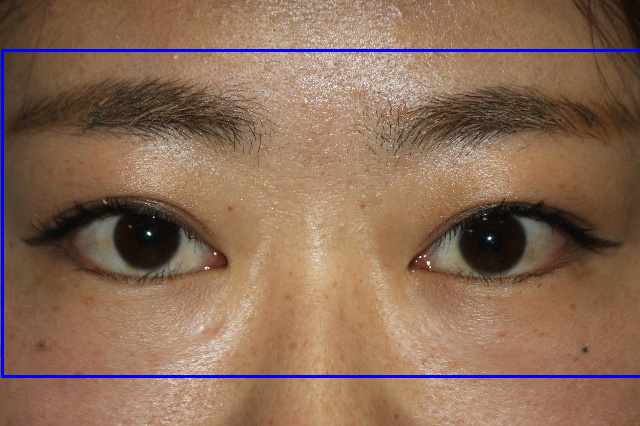

In [48]:
image_path = glob.glob(f"{dataset_grav}/*")
img = image_path[1]

class_names = {0:"cont", 1:"grav"}
pred = interference(img, weight)

# output result
x, y, w, h, prob, class_num = torch.round(pred[0][0])

# probability
prob = pred[0][0][4].item()

# class
class_name = class_names[pred[0][0][5].item()]

print("Ë®∫Êñ≠„ÅØ %s„ÄÅÁ¢∫Áéá„ÅØ%.1fÔºÖ„Åß„Åô„ÄÇ" %(class_name, prob*100))

img_cv2 = cv2.imread(img) 

# calculate coordinates of the bounding box (640*640„Å´padding„Åï„Çå„Å¶„ÅÑ„ÇãÂàÜ„ÅÆÂ∫ßÊ®ô„ÇíË∂≥„Åô)
img_height, img_width, _ = img_cv2.shape[:3]
print(f"img_height: {img_height}, img_width: {img_width}")
padding_x = (img_height - min(img_width, img_height))/2
padding_y = (img_width - min(img_width, img_height))/2
x = x - padding_x
y = (y - padding_y)*(img_height/img_width)
h = h * (img_height/img_width)
print(f"cx: {x}, cy: {y}, width: {w}, height: {h}")


# draw bounding box
cv2.rectangle(img_cv2, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)


# show image
cv2_imshow(img_cv2)